In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
kill.gender.value_counts().index      # x

Index(['M', 'F'], dtype='object')

In [6]:
kill.gender.value_counts().values    # y

array([2428,  107], dtype=int64)

<BarContainer object of 2 artists>

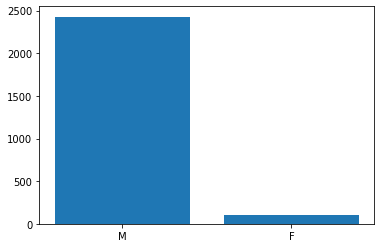

In [4]:
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index, kill.gender.value_counts().values)

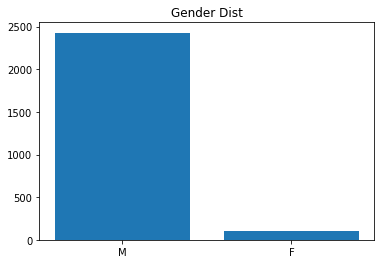

In [7]:
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index, kill.gender.value_counts().values)
ax.set_title("Gender Dist");

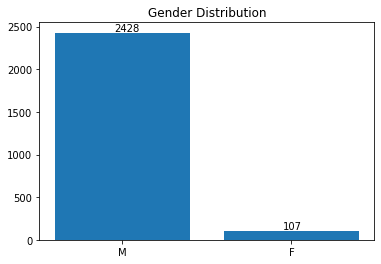

In [12]:
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index, kill.gender.value_counts().values)
ax.set_title("Gender Distribution");

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+ 0.35,p.get_height()+15))

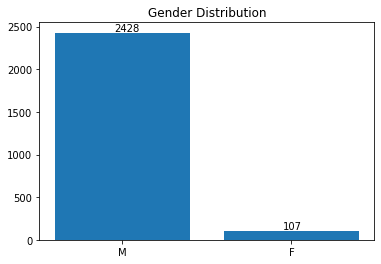

In [13]:
fig, fox = plt.subplots()                                                       # ax yerine başka bir şey de yazabiliriz.FOX örneğin.
fox.bar(kill.gender.value_counts().index, kill.gender.value_counts().values)   
fox.set_title("Gender Distribution");

for p in fox.patches:
    fox.annotate((p.get_height()), (p.get_x()+ 0.35,p.get_height()+15))

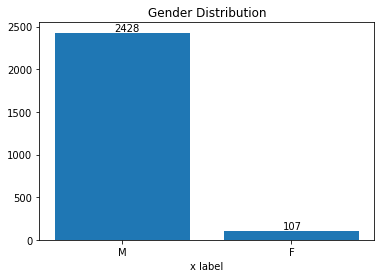

In [14]:
fig, ax = plt.subplots()                                                      
ax.bar(kill.gender.value_counts().index, kill.gender.value_counts().values)   
ax.set_title("Gender Distribution");
ax.set_xlabel("x label")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+ 0.35,p.get_height()+15))

In [15]:
ax.patches

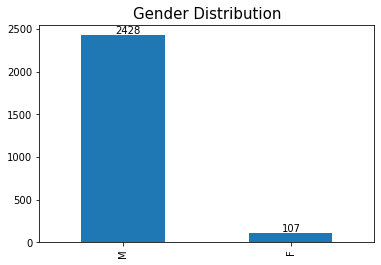

In [16]:
fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# or
# ax = kill.gender.value_counts().plot(kind='bar')
ax.set_title("Gender Distribution", fontsize=15)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

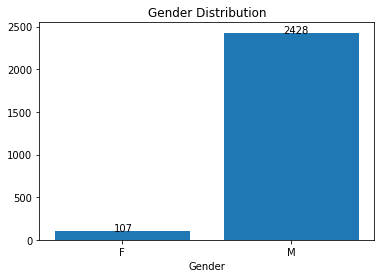

In [17]:
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index[::-1],kill.gender.value_counts().values[::-1])
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.35,p.get_height()+0.15));

Plot 7 most common kill weapons

In [18]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [19]:
kill.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [20]:
common_weapons = kill.armed.value_counts().head(7)

<BarContainer object of 7 artists>

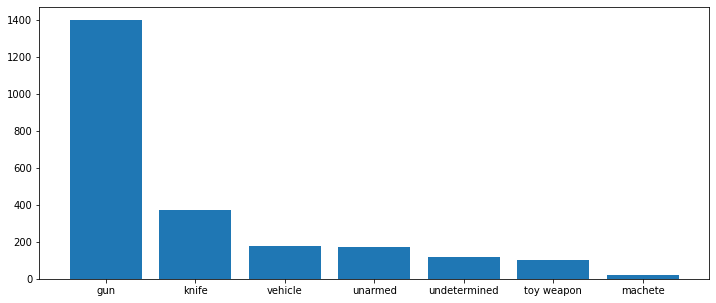

In [21]:
# with matplotlib

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x=common_weapons.index, height=common_weapons.values)


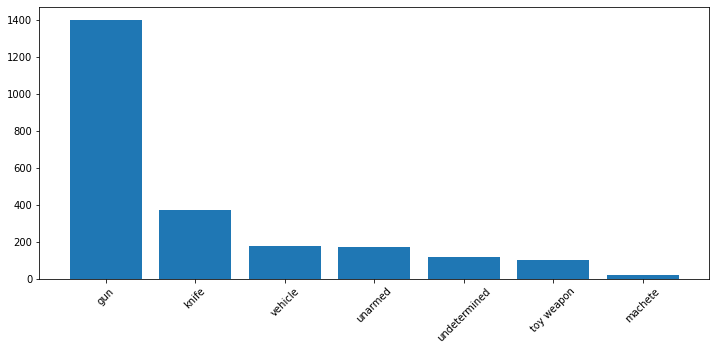

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x=common_weapons.index, height=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation= 45);

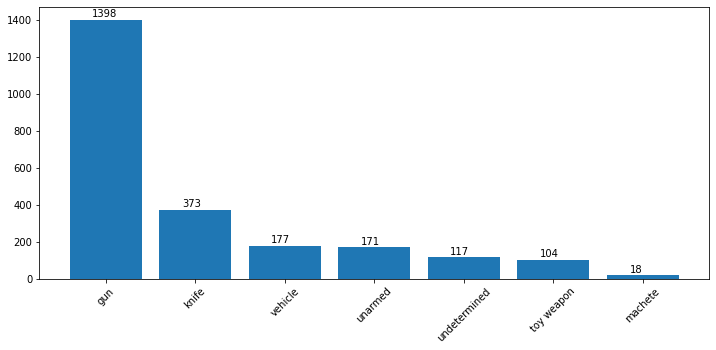

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x=common_weapons.index, height=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation= 45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+15));

In [28]:
ax.patches

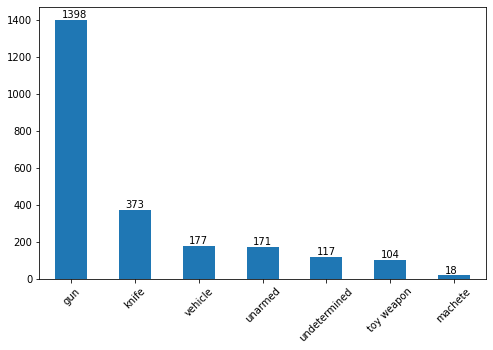

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
common_weapons.plot(kind='bar',ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

###  Plot number of age of killed people under two groups: Under 25 and Above 25

In [29]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [30]:
kill["age_cat"] = kill["age"].apply(lambda x: "above25" if x >= 25 else "below25")

In [31]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [34]:
age_class = kill.age_cat.value_counts()
age_class

above25    2008
below25     527
Name: age_cat, dtype: int64

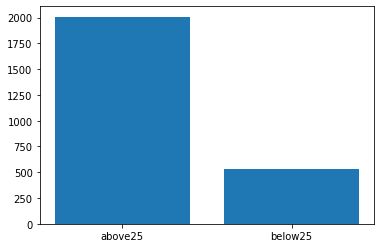

In [35]:
# with mmatplotlib

fig, ax = plt.subplots()
ax.bar(x=age_class.index, height=age_class.values);

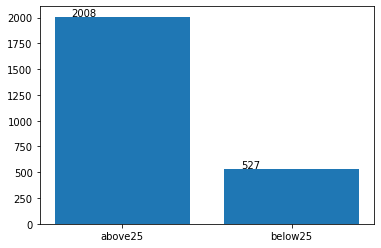

In [50]:
fig, ax = plt.subplots()
ax.bar(x=age_class.index, height=age_class.values)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

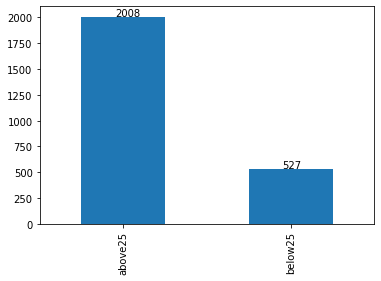

In [45]:
ax = age_class.plot.bar()
for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.2, p.get_height()+10));

###  Plot number  of killed people by race

In [48]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

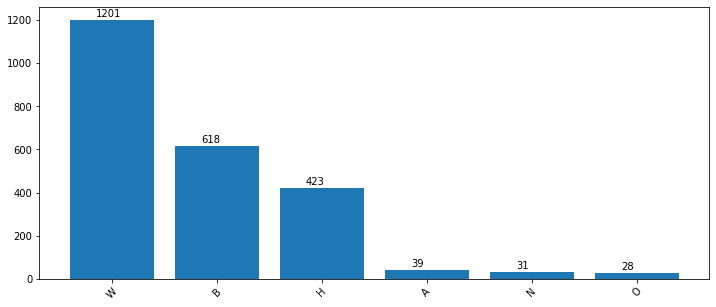

In [49]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(x=race_freq.index, height=race_freq.values)
ax.set_xticklabels(race_freq.index, rotation= 45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+15));

###  Killed People According to Races (Pie Charts)

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [52]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [53]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [54]:
kill.dropna(inplace=True)

In [55]:
kill.shape

(2254, 15)

In [56]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [58]:
indexes= kill.race.value_counts().index
indexes

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [59]:
values = kill.race.value_counts().values
values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

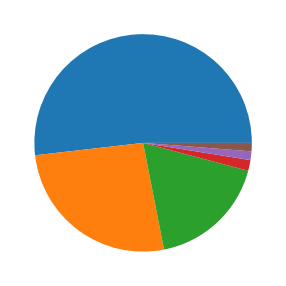

In [61]:
# matplotlib pie chart

fig,ax = plt.subplots(figsize =(10,5))
ax.pie(x= values);


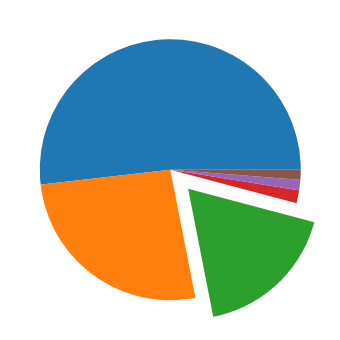

In [62]:
explode =(0,0,0.2,0,0,0)

fig,ax = plt.subplots(figsize =(12,6))
ax.pie(x= values,explode = explode );

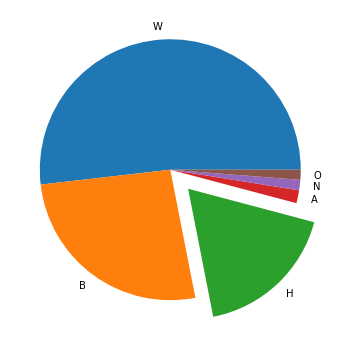

In [63]:
explode =(0,0,0.2,0,0,0)

fig,ax = plt.subplots(figsize =(12,6))
ax.pie(x= values,
       explode = explode, 
       labels=indexes );

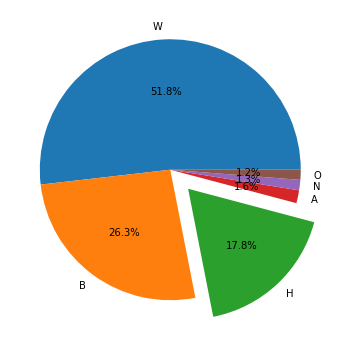

In [64]:
explode =(0,0,0.2,0,0,0)

fig,ax = plt.subplots(figsize =(12,6))
ax.pie(x= values,
       explode = explode, 
       labels=indexes,
       autopct = "%.1f%%");

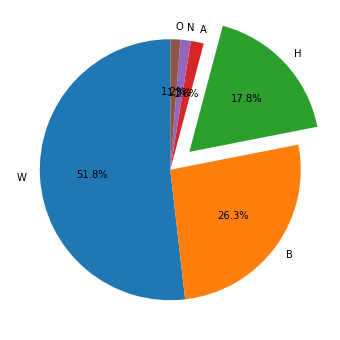

In [65]:
explode =(0,0,0.2,0,0,0)

fig,ax = plt.subplots(figsize =(12,6))
ax.pie(x= values,
       explode = explode, 
       labels=indexes,
       autopct = "%.1f%%",
      startangle = 90);

### 6. Soru

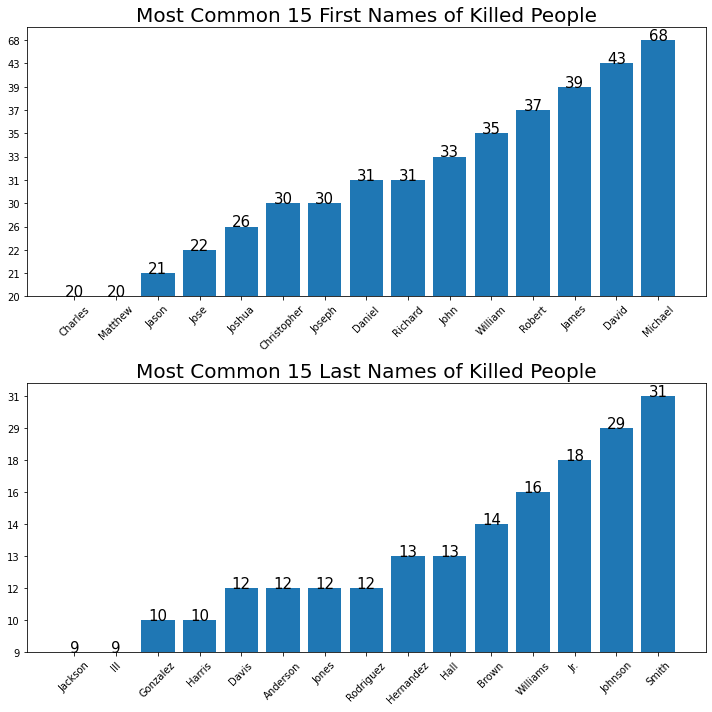

In [67]:
first_name = []
last_name = []
dictt_f = {}
dictt_l = {}
for i in kill.name.values:
    i = i.split()
    last_name.append(i[-1])
    first_name.append(i[0])
for i in first_name:
    dictt_f[i] = dictt_f.get(i, 0) + 1
for i in last_name:
    dictt_l[i] = dictt_l.get(i, 0) + 1
    
first_list = sorted(dictt_f.items(), key=lambda x : x[1], reverse=True)
last_list = sorted(dictt_l.items(), key=lambda x : x[1], reverse=True)

arr_f = np.array(first_list[:15])
arr_l = np.array(last_list[:15])

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
mylabels_f = arr_f[:,0][::-1]
data_f = arr_f[:,1][::-1]
plt.bar(mylabels_f, data_f)
plt.xticks(rotation=45)
plt.title('Most Common 15 First Names of Killed People', fontdict={'fontsize':20})
p = np.arange(len(mylabels_f))
for i in range(len(mylabels_f)):
    plt.text(x=p[i], y=data_f[i], s=data_f[i], ha='center', size=15)

plt.subplot(2,1,2)
mylabels_l = arr_l[:,0][::-1]
data_l = arr_l[:,1][::-1]
plt.bar(mylabels_l, data_l)
plt.xticks(rotation=45)
plt.title('Most Common 15 Last Names of Killed People', fontdict={'fontsize':20})
for i in range(len(mylabels_l)):
    plt.text(x=p[i], y=data_l[i], s=data_l[i], ha='center', size=15)
plt.tight_layout()